In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
from typing import List, Union, Iterable, Tuple
from infix import shift_infix as infix
from sklearn.metrics import r2_score

In [31]:
@infix
def fC(f:callable, g:callable):
    return f(g)

In [6]:
pathData:str = '../../../data/realData/'
dfTanouchi25:pd.DataFrame = pd.read_csv(pathData + 'Tanouchi25C.csv')
dfTanouchi37:pd.DataFrame = pd.read_csv(pathData + 'Tanouchi37C.csv')
dataFrames:List[pd.DataFrame] = [dfTanouchi25, dfTanouchi37]

In [24]:
for df in dataFrames:
    df['lineage_ID'] = df['lineage_ID'].astype(int)

def lineages(df:pd.DataFrame) -> List[np.array]:
    uniqueLineages:np.array = df['lineage_ID'].unique()
    returnList = []
    for lineage in uniqueLineages:
        newDf:pd.DataFrame = df[df['lineage_ID'] == lineage]
        returnList.append(np.array(newDf['length_birth']))

    return returnList

In [67]:
def autoCorrelationFunc(t:Union[float,np.array], n_c:Union[float,np.array], xi:Union[float,np.array]) -> Union[float, np.array]:
    return t**(-n_c) * np.exp(-t/xi)

def autoCorrelationFuncExp(t:Union[float,np.array], a:Union[float,np.array], xi:Union[float,np.array]) -> Union[float, np.array]:
    return a + np.exp(-t/xi)

In [44]:
def getAutocorrelationInfo(timeSeries:Iterable, autoCorrFunc:callable) -> tuple:
    autocorrelation:Iterable = acf(timeSeries,fft = True, nlags = len(timeSeries) - 1)
    popt, _ = curve_fit(autoCorrFunc, list<<fC>>range(1, len(autocorrelation) + 1), autocorrelation)
    r2Score = r2_score(y_true=timeSeries, y_pred=autocorrelation)
    return autocorrelation, popt, r2Score

In [68]:
lineages25 = lineages(dfTanouchi25)
lineages37 = lineages(dfTanouchi37)
autocorrelationInfo25 = list<<fC>>map(lambda x: getAutocorrelationInfo(x, autoCorrelationFunc), lineages25)
autocorrelationInfo37 = list<<fC>>map(lambda x: getAutocorrelationInfo(x, autoCorrelationFunc), lineages37)

/Applications/anaconda3/envs/new_base/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


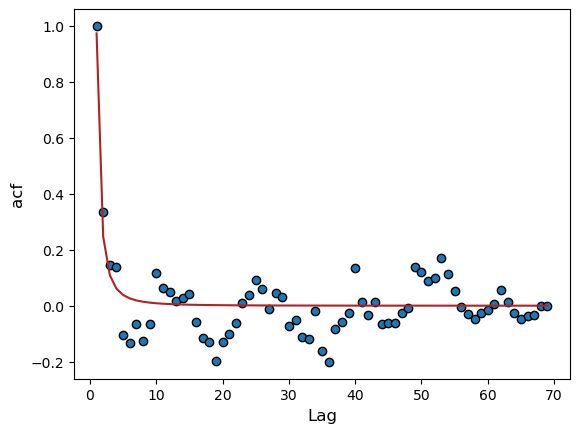

In [81]:
sampleToPlot = autocorrelationInfo25[0]
plt.scatter(range(1, len(sampleToPlot[0]) + 1), sampleToPlot[0], edgecolor = 'black')
plt.plot(range(1, len(sampleToPlot[0]) + 1), autoCorrelationFunc(np.array(list(range(1, len(sampleToPlot[0]) + 1))), *sampleToPlot[1]), color = 'firebrick')
plt.xlabel('Lag', fontsize = 12)
plt.ylabel('acf', fontsize = 12)
plt.show()

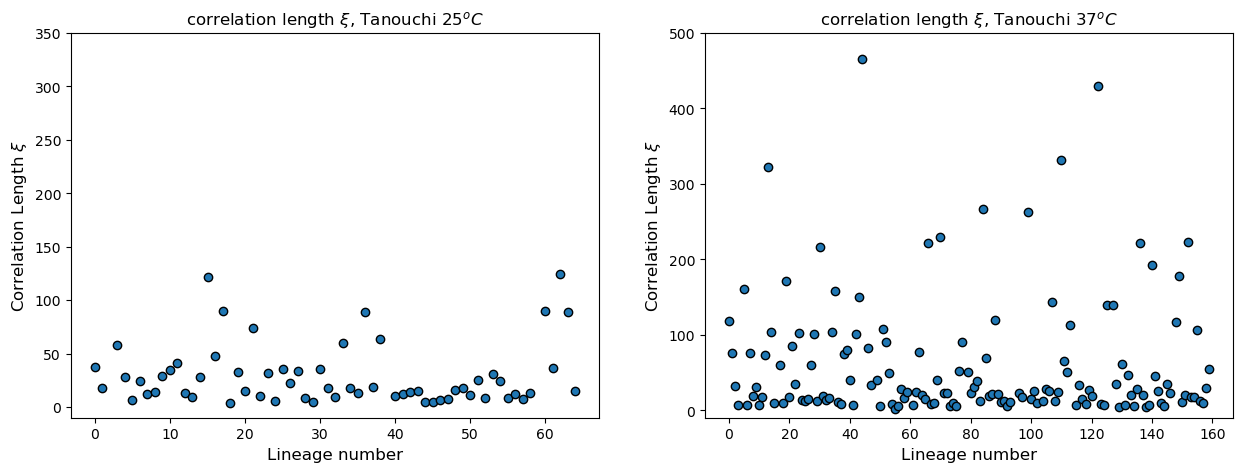

In [96]:
fig, ax_ = plt.subplots(1, 2, figsize = (15, 5))
ax1, ax2 = ax_
corLengths25 = list<<fC>>map(lambda x: x[1][1], autocorrelationInfo25)
ax1.scatter(range<<fC>>len(corLengths25), corLengths25, edgecolor = 'black')
ax1.set_title('correlation length $\\xi$, Tanouchi $25^oC$')
ax1.set_xlabel('Lineage number', fontsize = 12)
ax1.set_ylabel('Correlation Length $\\xi$', fontsize = 12)
_ = ax1.set_ylim(bottom = -10, top = 350)

corLengths37 = list<<fC>>map(lambda x: x[1][1], autocorrelationInfo37)
ax2.scatter(range<<fC>>len(corLengths37), corLengths37, edgecolor = 'black')
ax2.set_title('correlation length $\\xi$, Tanouchi $37^oC$')
ax2.set_xlabel('Lineage number', fontsize = 12)
_ = ax2.set_ylabel('Correlation Length $\\xi$', fontsize = 12)
_ = ax2.set_ylim(bottom = -10, top = 500)